In [30]:
import tensorflow as tf 
import numpy as np
import tensorflow_datasets as tfds 
import matplotlib.pyplot as plt

In [21]:

#this is duplicating each element in the dataset in a tuple so that both the input and the label are the same image. 
def map_image(image, label): 
  image = tf.cast(image, dtype=tf.float32)
  image = image/255. 
  image = tf.reshape(image, shape = (784,))
  return image, image

In [35]:
BATCH_SIZE=128
BUFFER_SIZE = 1024 

train_dataset, info = tfds.load("fashion_mnist", with_info=True, split="train", as_supervised=True)
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset, info = tfds.load("fashion_mnist", with_info=True, as_supervised = True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()




In [25]:
def deep_autoencoder():
  encoder = tf.keras.layers.Dense(128, activation="relu")(inputs)
  encoder = tf.keras.layers.Dense(64, activation="relu")(encoder)
  encoder = tf.keras.layers.Dense(32, activation="relu")(encoder)

  decoder = tf.keras.layers.Dense(64, activation="relu")(encoder)
  decoder = tf.keras.layers.Dense(128, activation="relu")(decoder)
  decoder = tf.keras.layers.Dense(784, activation="relu")(decoder)

  return encoder, decoder

#input to the model.
inputs = tf.keras.layers.Input(shape=(784,))

#get the output layers for the encoder and decoder.
deep_encoder_output, deep_autoencoder_output = deep_autoencoder() 

#setup separate models for the encoder.
deep_encoder_model = tf.keras.Model(inputs = inputs, outputs = deep_encoder_output)

#setup seperate model for the decoder.
deep_autoencoder_model = tf.keras.Model(inputs = inputs, outputs = deep_autoencoder_output)



In [33]:
train_steps = info.splits["train"].num_examples / BATCH_SIZE

deep_autoencoder_model.compile(optimizer = tf.keras.optimizers.Adam(), loss="binary_crossentropy")
deep_auto_history = deep_autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 [==============================] - 9s 17ms/step - loss: 0.4426
Epoch 2/50
468/468 [==============================] - 8s 17ms/step - loss: 0.4816
Epoch 3/50
468/468 [==============================] - 8s 17ms/step - loss: 0.4557
Epoch 4/50
468/468 [==============================] - 8s 17ms/step - loss: 0.4461
Epoch 5/50
468/468 [==============================] - 8s 17ms/step - loss: 0.4286
Epoch 6/50
468/468 [==============================] - 8s 17ms/step - loss: 0.4285
Epoch 7/50
468/468 [==============================] - 8s 17ms/step - loss: 0.4266
Epoch 8/50
468/468 [==============================] - 8s 17ms/step - loss: 0.4436
Epoch 9/50
468/468 [==============================] - 8s 17ms/step - loss: 0.4402
Epoch 10/50
468/468 [==============================] - 8s 17ms/step - loss: 0.4279
Epoch 11/50
468/468 [==============================] - 8s 17ms/step - loss: 0.4312
Epoch 12/50
468/468 [==============================] - 8s 17ms/step - loss: 0.4458
Epoch 13/50
4

In [28]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

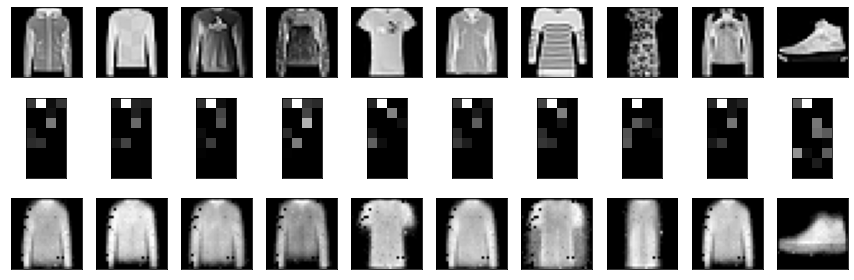

In [38]:
test_dataset = test_dataset.take(1) 

output_samples = [] 
for input_image, image in tfds.as_numpy(test_dataset):
  output_samples = input_image

idxs = np.random.choice(BATCH_SIZE, size=10)

encoded_predicted = deep_encoder_model.predict(test_dataset)
deep_predicted = deep_autoencoder_model.predict(test_dataset)

display_results(output_samples[idxs], encoded_predicted[idxs], deep_predicted[idxs])